# Inference Demo

## Set Environmental Parameters

In [1]:
import os
import cv2
import torch

os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="0"

device = torch.device('cuda')

torch.backends.cudnn.enabled = True
torch.backends.cudnn.benchmark = True

## Set Model Configuration

In [2]:
from uyoloseg.utils.register import import_all_modules_for_register
from uyoloseg.utils import cfg

import_all_modules_for_register()

config_path = '/project/uyolo-segmentation/configs/custom.yaml'
model_path = '/project/expressage/weights/model_best_avg.pth'
image_path = '/project/datasets/expressage/images/expressage_3421.jpg'

cfg.merge_from_file(config_path)

## Set Model Predictor

In [3]:
from demo import Predictor
predictor = Predictor(cfg, model_path, device=device)

In [9]:
mask = predictor.inference(image_path)[0].argmax(dim=1).permute(1, 2, 0)

## Visualisation

In [13]:
from IPython.display import display
from PIL import Image

import numpy as np

def cv2_imshow(a, convert_bgr_to_rgb=True):
    """A replacement for cv2.imshow() for use in Jupyter notebooks.
    Args:
        a: np.ndarray. shape (N, M) or (N, M, 1) is an NxM grayscale image. shape
            (N, M, 3) is an NxM BGR color image. shape (N, M, 4) is an NxM BGRA color
            image.
        convert_bgr_to_rgb: switch to convert BGR to RGB channel.
    """
    a = a.clip(0, 255).astype('uint8')
    # cv2 stores colors as BGR; convert to RGB
    if convert_bgr_to_rgb and a.ndim == 3:
        if a.shape[2] == 4:
            a = cv2.cvtColor(a, cv2.COLOR_BGRA2RGBA)
        else:
            a = cv2.cvtColor(a, cv2.COLOR_BGR2RGB)
    display(Image.fromarray(a))

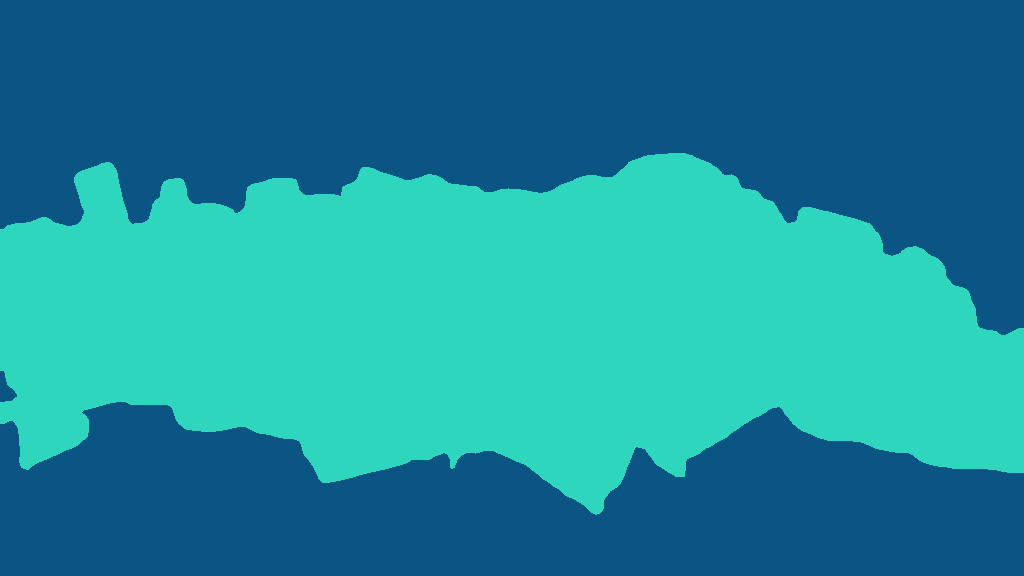

In [17]:
# show img
# display(Image.open(image_path))

# show mask
palette = np.random.randint(0, 256, (256, 3), dtype=np.uint8)
out = mask.squeeze().cpu().numpy()
cv2_imshow(palette[out])